<a href="https://colab.research.google.com/github/supunabeywickrama/OpenCV_Facial-Landmark-Detection-Face-Swap/blob/main/OpenCV_Facial_Landmark_Detection_%26_Face_Swap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()



In [5]:
# Load the facial landmark predictor
predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")
print("Facial landmark predictor loaded.")

Facial landmark predictor loaded.


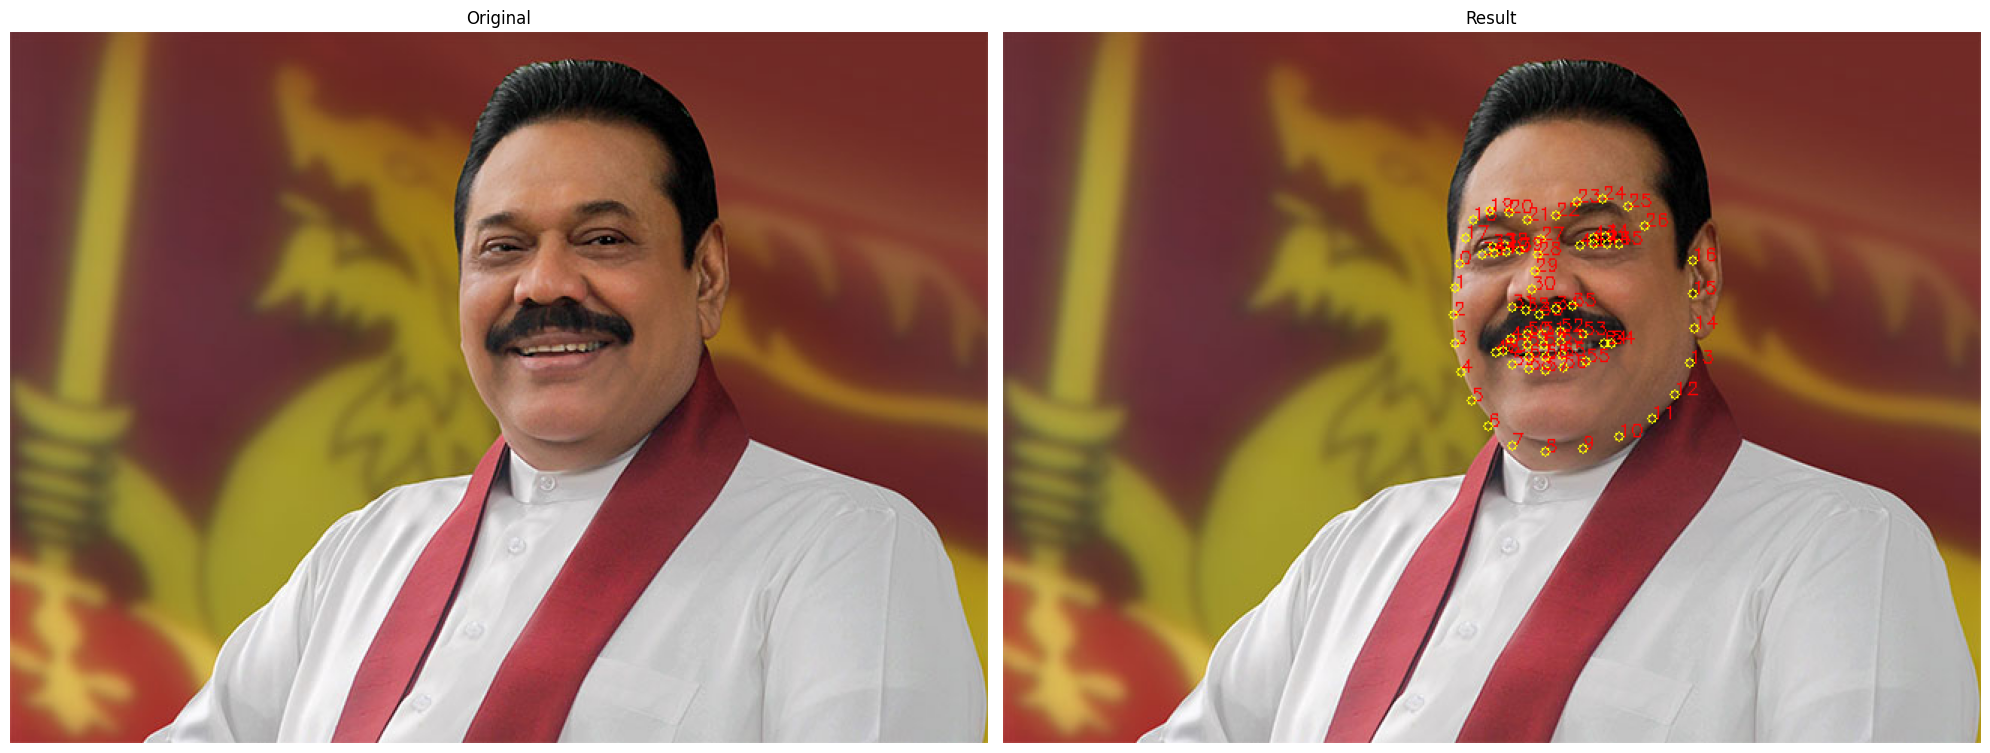

In [30]:
PREDICTOR_PATH = "/content/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(PREDICTOR_PATH)
detector=dlib.get_frontal_face_detector()

class TooManyFaces(Exception):
    pass

class NoFaces(Exception):
    pass

def get_landmarks(im):
    rects = detector(im, 1)

    if len(rects)>1:
      raise TooManyFaces
    if len(rects)==0:
      raise NoFaces

    return np.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, point in enumerate(landmarks):
       pos = (point[0, 0], point[0, 1])
       cv2.putText(im, str(idx), pos,
              fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
              fontScale=0.4,

              color=(0, 0, 255))
       cv2.circle(im, pos, 3, color=(0, 255, 255))
    return im

def imshow(ax, title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    fig_width = size * aspect_ratio
    fig_height = size

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(title)
    ax.axis('off') # Hide axes

import requests

image_url = 'https://adaderanaenglish.s3.amazonaws.com/1649913995-pm-mahinda-rajapaksa.jpg'
response = requests.get(image_url)
image_array = np.frombuffer(response.content, dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)


if image is None:
    print("Error: Could not load image from URL.")
else:
    landmarks = get_landmarks(image)
    image_with_landmarks = annotate_landmarks(image, landmarks)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # Display images in subplots
    imshow(axes[0], 'Original', image)
    imshow(axes[1], 'Result', image_with_landmarks)

    plt.tight_layout() # Adjust layout to prevent overlapping titles
    plt.show()

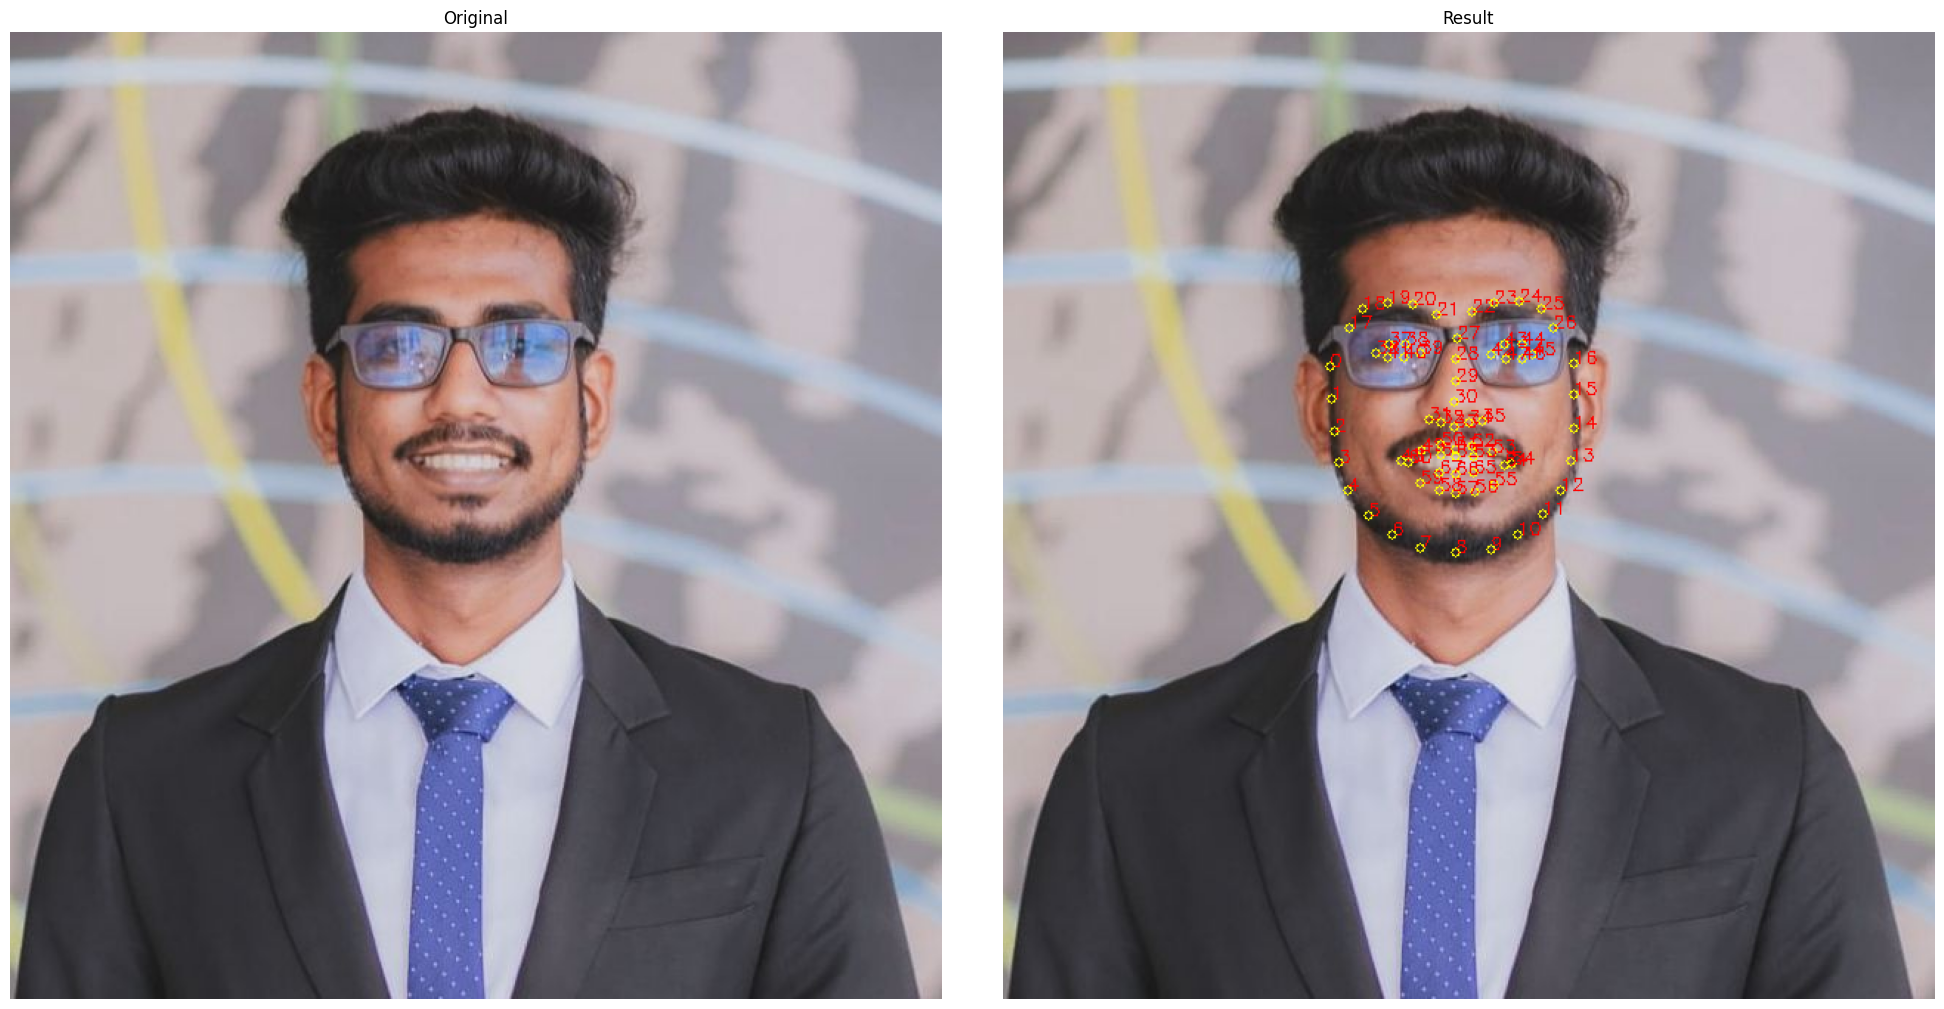

In [25]:
PREDICTOR_PATH = "/content/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(PREDICTOR_PATH)
detector=dlib.get_frontal_face_detector()

class TooManyFaces(Exception):
    pass

class NoFaces(Exception):
    pass

def get_landmarks(im):
    rects = detector(im, 1)

    if len(rects)>1:
      raise TooManyFaces
    if len(rects)==0:
      raise NoFaces

    return np.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, point in enumerate(landmarks):
       pos = (point[0, 0], point[0, 1])
       cv2.putText(im, str(idx), pos,
              fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
              fontScale=0.4,

              color=(0, 0, 255))
       cv2.circle(im, pos, 3, color=(0, 255, 255))
    return im

def imshow(ax, title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    fig_width = size * aspect_ratio
    fig_height = size

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(title)
    ax.axis('off') # Hide axes


image_path = '/content/supun1.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image from {image_path}. Make sure the file exists.")
else:
    landmarks = get_landmarks(image)
    image_with_landmarks = annotate_landmarks(image, landmarks)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # Display images in subplots
    imshow(axes[0], 'Original', image)
    imshow(axes[1], 'Result', image_with_landmarks)

    plt.tight_layout() # Adjust layout to prevent overlapping titles
    plt.show()

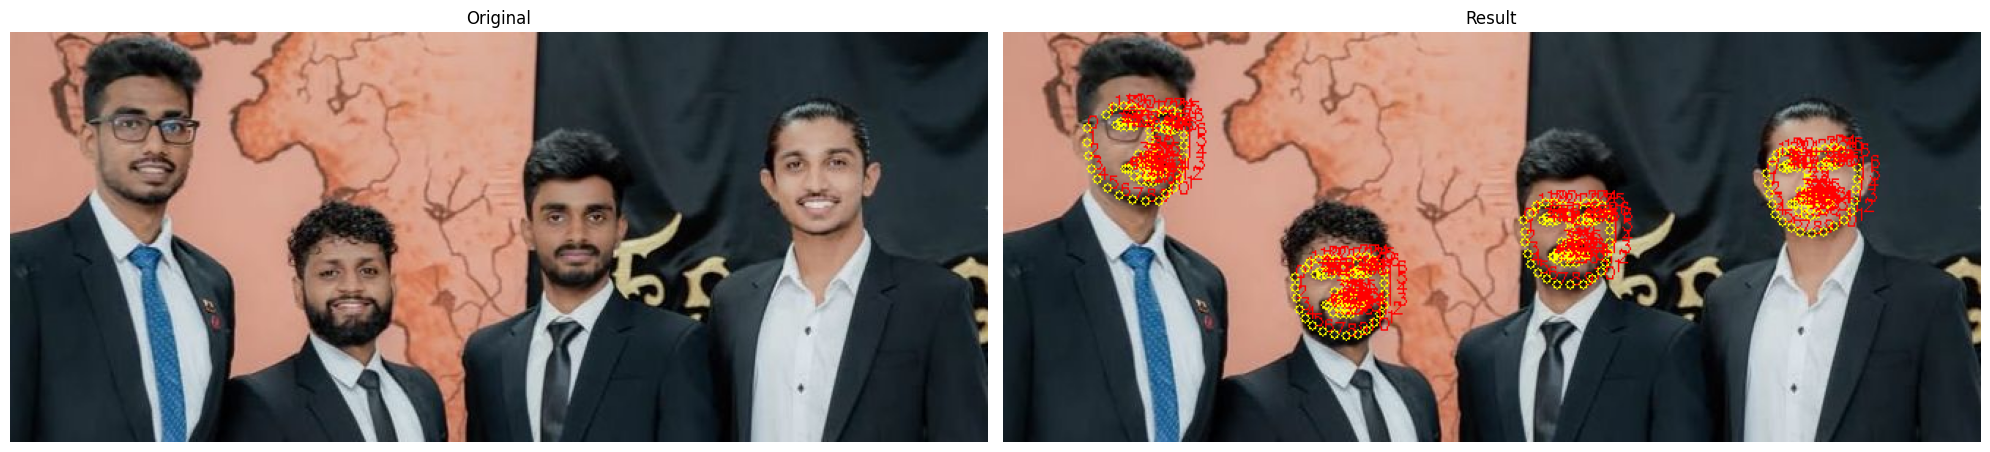

In [28]:
PREDICTOR_PATH = "/content/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(PREDICTOR_PATH)
detector=dlib.get_frontal_face_detector()

class NoFaces(Exception):
    pass

def get_landmarks(im):
    rects = detector(im, 1)

    if len(rects)==0:
      raise NoFaces

    return [np.matrix([[p.x, p.y] for p in predictor(im, rect).parts()]) for rect in rects]

def annotate_landmarks(im, landmarks_list):
    im = im.copy()
    for landmarks in landmarks_list:
        for idx, point in enumerate(landmarks):
           pos = (point[0, 0], point[0, 1])
           cv2.putText(im, str(idx), pos,
                  fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                  fontScale=0.4,

                  color=(0, 0, 255))
           cv2.circle(im, pos, 3, color=(0, 255, 255))
    return im

def imshow(ax, title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    fig_width = size * aspect_ratio
    fig_height = size

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(title)
    ax.axis('off') # Hide axes


image_path = '/content/supun2.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image from {image_path}. Make sure the file exists.")
else:
    try:
        landmarks_list = get_landmarks(image)
        image_with_landmarks = annotate_landmarks(image, landmarks_list)

        # Create a figure with two subplots
        fig, axes = plt.subplots(1, 2, figsize=(20, 10))

        # Display images in subplots
        imshow(axes[0], 'Original', image)
        imshow(axes[1], 'Result', image_with_landmarks)

        plt.tight_layout() # Adjust layout to prevent overlapping titles
        plt.show()
    except NoFaces:
        print("Error: No faces found in the image.")

# **Face Swaps with Dlib**

    Perform Face Swapping Using Dlib

In [31]:
import cv2
import dlib
import sys
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
  w, h = image. shape [0], image. shape [1]
  aspect_ratio = w/h
  plt.figure(figsize=(size * aspect_ratio, size) )
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

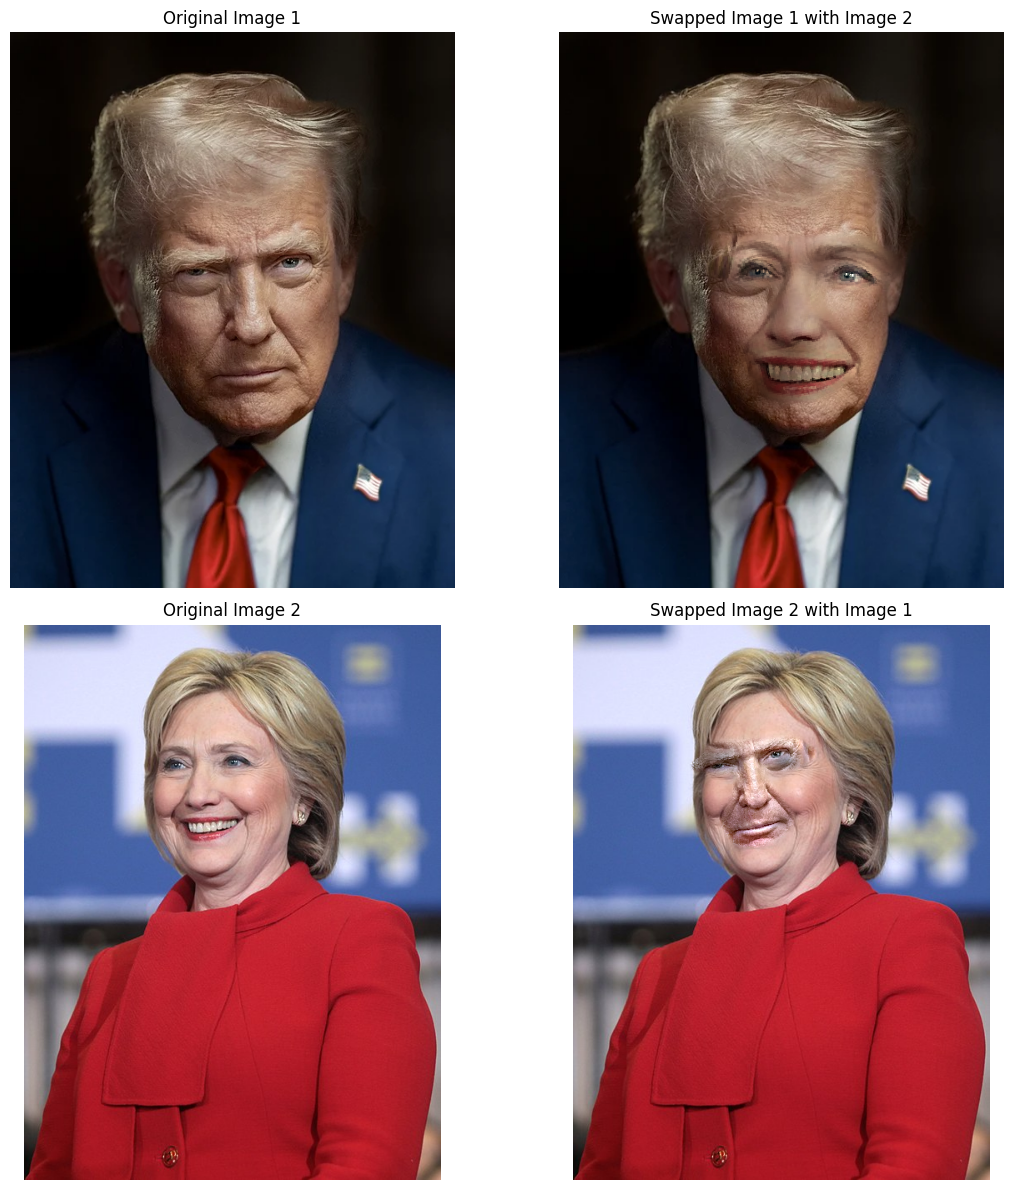

In [45]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Define constants
PREDICTOR_PATH = "/content/shape_predictor_68_face_landmarks.dat"
SCALE_FACTOR = 1
FEATHER_AMOUNT = 11

FACE_POINTS = list(range(17, 68))
MOUTH_POINTS = list(range(48, 61))
RIGHT_BROW_POINTS = list(range(17, 22))
LEFT_BROW_POINTS = list(range(22, 27))
RIGHT_EYE_POINTS = list(range(36, 42))
LEFT_EYE_POINTS = list(range(42, 48))
NOSE_POINTS = list(range(27, 35))
JAW_POINTS = list(range(0, 17))

ALIGN_POINTS = (LEFT_BROW_POINTS + RIGHT_EYE_POINTS + LEFT_EYE_POINTS +
                RIGHT_BROW_POINTS + NOSE_POINTS + MOUTH_POINTS)

OVERLAY_POINTS = [
    LEFT_EYE_POINTS + RIGHT_EYE_POINTS + LEFT_BROW_POINTS + RIGHT_BROW_POINTS,
    NOSE_POINTS + MOUTH_POINTS,
]

COLOUR_CORRECT_BLUR_FRAC = 0.6

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(PREDICTOR_PATH)

# Exceptions for detecting faces
class TooManyFaces(Exception):
    pass

class NoFaces(Exception):
    pass

# Function to get landmarks
def get_landmarks(im):
    rects = detector(im, 1)

    if len(rects) > 1:
        raise TooManyFaces
    if len(rects) == 0:
        raise NoFaces

    return np.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

# Function to annotate landmarks
def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0, 0], point[0, 1])
        cv2.putText(im, str(idx), pos,
                    fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                    fontScale=0.4,
                    color=(0, 0, 255))
        cv2.circle(im, pos, 3, color=(0, 255, 255))
    return im

# Function to draw convex hull
def draw_convex_hull(im, points, color):
    points = cv2.convexHull(points)
    cv2.fillConvexPoly(im, points, color=color)

# Function to get face mask
def get_face_mask(im, landmarks):
    im = np.zeros(im.shape[:2], dtype=np.float64)

    for group in OVERLAY_POINTS:
        draw_convex_hull(im, landmarks[group], color=1)

    im = np.array([im, im, im]).transpose((1, 2, 0))
    im = (cv2.GaussianBlur(im, (FEATHER_AMOUNT, FEATHER_AMOUNT), 0) > 0) * 1.0
    im = cv2.GaussianBlur(im, (FEATHER_AMOUNT, FEATHER_AMOUNT), 0)

    return im

# Function to get transformation from points
def transformation_from_points(points1, points2):
    points1 = points1.astype(np.float64)
    points2 = points2.astype(np.float64)

    c1 = np.mean(points1, axis=0)
    c2 = np.mean(points2, axis=0)
    points1 -= c1
    points2 -= c2

    s1 = np.std(points1)
    s2 = np.std(points2)
    points1 /= s1
    points2 /= s2

    U, S, Vt = np.linalg.svd(np.dot(points1.T, points2))

    R = np.dot(U, Vt)

    return np.vstack([np.hstack([(s2 / s1) * R, c2.T - (s2 / s1) * R * c1.T]),
                      np.matrix([0., 0., 1.])])

# Function to read image and landmarks
def read_im_and_landmarks(image):
    im = image
    if im is None:
        print("Input image is None")
        return None, None
    im = cv2.resize(im, None, fx=1, fy=1, interpolation=cv2.INTER_LINEAR)
    im = cv2.resize(im, (im.shape[1] * SCALE_FACTOR, im.shape[0] * SCALE_FACTOR))
    try:
        s = get_landmarks(im)
    except (TooManyFaces, NoFaces) as e:
        print(f"Error getting landmarks - {e}")
        return im, None

    return im, s

# Function to warp image based on transformation matrix
def warp_im(im, M, dshape):
    output_im = np.zeros(dshape, dtype=im.dtype)
    if im is None or im.shape[0] == 0 or im.shape[1] == 0:
        print("Input image is empty or None")
        return output_im
    cv2.warpAffine(im,
                   M[:2],
                   (dshape[1], dshape[0]),
                   dst=output_im,
                   borderMode=cv2.BORDER_TRANSPARENT,
                   flags=cv2.WARP_INVERSE_MAP)
    return output_im

# Function to correct colours between images
def correct_colours(im1, im2, landmarks1):
    if im1 is None or im1.shape[0] == 0 or im1.shape[1] == 0:
        print("Input im1 is empty or None")
        return im1
    if im2 is None or im2.shape[0] == 0 or im2.shape[1] == 0:
        print("Input im2 is empty or None")
        return im2
    if landmarks1 is None:
        print("landmarks1 is None")
        return im2  # Return im2 if landmarks are missing

    blur_amount = COLOUR_CORRECT_BLUR_FRAC * np.linalg.norm(
        np.mean(landmarks1[LEFT_EYE_POINTS], axis=0) -
        np.mean(landmarks1[RIGHT_EYE_POINTS], axis=0))
    blur_amount = int(blur_amount)
    if blur_amount % 2 == 0:
        blur_amount += 1
    im1_blur = cv2.GaussianBlur(im1, (blur_amount, blur_amount), 0)
    im2_blur = cv2.GaussianBlur(im2, (blur_amount, blur_amount), 0)

    im2_blur += (128 * (im2_blur <= 1.0)).astype(im2_blur.dtype)

    return (im2.astype(np.float64) * im1_blur.astype(np.float64) /
            im2_blur.astype(np.float64))

# Function to perform face swap
def swappy(image1, image2):
    im1, landmarks1 = read_im_and_landmarks(image1)
    im2, landmarks2 = read_im_and_landmarks(image2)

    if im1 is None or im2 is None:
        print("Failed to read input images.")
        return None

    if landmarks1 is None or landmarks2 is None:
        print("Could not detect landmarks in one or both images.")
        return None

    M = transformation_from_points(landmarks1[ALIGN_POINTS], landmarks2[ALIGN_POINTS])
    mask = get_face_mask(im2, landmarks2)
    warped_mask = warp_im(mask, M, im1.shape)
    combined_mask = np.max([get_face_mask(im1, landmarks1), warped_mask], axis=0)

    warped_im2 = warp_im(im2, M, im1.shape)
    if warped_im2 is None or warped_im2.shape[0] == 0 or warped_im2.shape[1] == 0:
        print("warped_im2 is empty or None.")
        return None

    warped_corrected_im2 = correct_colours(im1, warped_im2, landmarks1)
    if warped_corrected_im2 is None or warped_corrected_im2.shape[0] == 0 or warped_corrected_im2.shape[1] == 0:
        print("warped_corrected_im2 is empty or None.")
        return None

    output_im = im1 * (1.0 - combined_mask) + warped_corrected_im2 * combined_mask
    if output_im is None or output_im.shape[0] == 0 or output_im.shape[1] == 0:
        print("output_im is empty or None.")
        return None

    # Convert the image back to uint8 for displaying
    output_im = np.uint8(np.clip(output_im, 0, 255))
    return output_im

# Reading images
image1 = cv2.imread('/content/trump.webp')
image2 = cv2.imread('/content/hilary.jpg')

if image1 is None:
    print("Could not load image1 from /content/trump.webp")
if image2 is None:
    print("Could not load image2 from /content/hilary.jpg")

# Make sure both images are loaded
if image1 is not None and image2 is not None:
    # Get swapped images
    swapped1 = swappy(image1, image2)
    swapped2 = swappy(image2, image1)

    if swapped1 is not None and swapped2 is not None:
        # Create the figure with subplots
        fig, axes = plt.subplots(2, 2, figsize=(12, 12))

        # First row: Original Image1 and its swapped version
        axes[0, 0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
        axes[0, 0].set_title('Original Image 1')
        axes[0, 0].axis('off')

        axes[0, 1].imshow(cv2.cvtColor(swapped1, cv2.COLOR_BGR2RGB))
        axes[0, 1].set_title('Swapped Image 1 with Image 2')
        axes[0, 1].axis('off')

        # Second row: Original Image2 and its swapped version
        axes[1, 0].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
        axes[1, 0].set_title('Original Image 2')
        axes[1, 0].axis('off')

        axes[1, 1].imshow(cv2.cvtColor(swapped2, cv2.COLOR_BGR2RGB))
        axes[1, 1].set_title('Swapped Image 2 with Image 1')
        axes[1, 1].axis('off')

        # Show the images
        plt.tight_layout()
        plt.show()
